Dataset Preview:
   Hours_Studied  Passed
0              1       0
1              2       0
2              3       0
3              4       0
4              5       1
\Accuracy: 1.0
\Confusion Matrix:
 [[1 0]
 [0 1]]
\Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


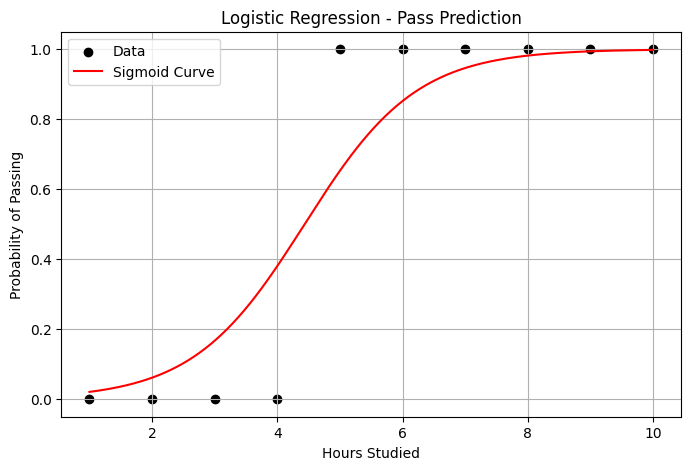


Prediction for 7 hours studied: Probability of pass = 0.95, Class = 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (ensure CSV is uploaded in Colab or same directory)
df = pd.read_csv("/content/logistic_regression_sample_dataset.csv")
print("Dataset Preview:")
print(df.head())

# Features and target
X = df[["Hours_Studied"]]
y = df["Passed"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print("\Accuracy:", accuracy_score(y_test, y_pred))
print("\Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\Classification Report:\n", classification_report(y_test, y_pred))

# Visualize decision boundary
plt.figure(figsize=(8, 5))
x_vals = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_vals = model.predict_proba(x_vals)[:, 1]

plt.scatter(X, y, color='black', label='Data')
plt.plot(x_vals, y_vals, color='red', label='Sigmoid Curve')
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression - Pass Prediction")
plt.legend()
plt.grid(True)
plt.show()


# Predict for new value (e.g., 7 hours)
new_val = [[7]]
pred_prob = model.predict_proba(new_val)[0][1]
pred_class = model.predict(new_val)[0]

print(f"\nPrediction for 7 hours studied: Probability of pass = {pred_prob:.2f}, Class = {pred_class}")